# Project Summary

## Your project will be to forecast the Aaa corporate bond yield for the next 6 month based on the data colleced from https://fred.stlouisfed.org/series/AAA?utm_source=series_page&utm_medium=related_content&utm_term=other_formats&utm_campaign=other_format

#### The  Data is a monthy based frequency since early 1900s
#### Foreast 6 months into the future with your focus being 2020-4-1
#### Plot yout forecast againt the initial period and predict what the Aaa corporate bond yield will be for the month of April

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## monthly

In [148]:
data = pd.read_csv("resources/AAA.csv", parse_dates =True, index_col="DATE")

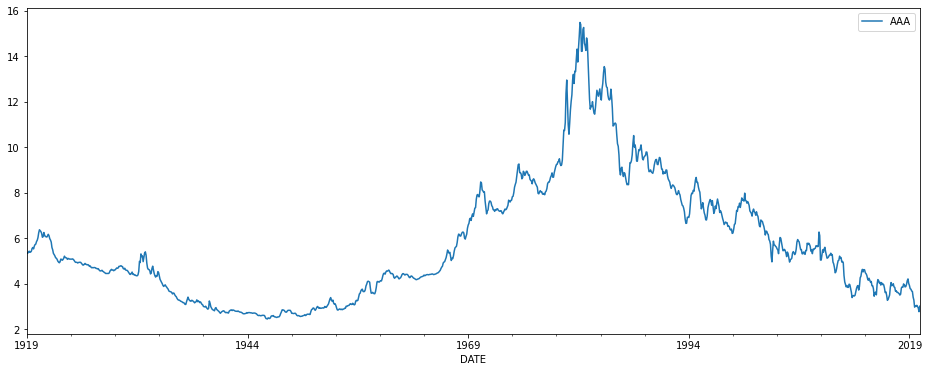

In [149]:
data.plot(figsize = (16,6))

In [150]:
data.tail(3)

,AAA
DATE,
2020-01-01,2.94
2020-02-01,2.78
2020-03-01,3.02


### we have 1215 Months of data (101.15 years)

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1215 entries, 1919-01-01 to 2020-03-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAA     1215 non-null   float64
dtypes: float64(1)
memory usage: 19.0 KB


### training and testing on data 
- We will take 15 years of data to train on for starters
- 180 months

In [152]:
train_sample = 180

In [153]:
train_index = len(data) - train_sample

In [154]:
train = data.iloc[:train_index]

In [155]:
test  = data.iloc[train_index:]

In [156]:
train.shape

(1035, 1)

In [157]:
test.shape

(180, 1)

## scaling the data 

In [158]:
from sklearn.preprocessing import MinMaxScaler

In [159]:
scalar = MinMaxScaler()

In [160]:
train_scaled = scalar.fit_transform(train)

In [161]:
test_scaled = scalar.transform(test)

### Time series Generator
- Length will be 6 months
- Time frame our model will try to predict based on the training set 

In [162]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [163]:
length = 6
generator = TimeseriesGenerator(train_scaled,train_scaled,length=length, batch_size=1)

#### Early Stopping
- We will need this to expad our Epochs and observe the loss in our validation data

In [164]:
from tensorflow.keras.callbacks import EarlyStopping

In [165]:
stop = EarlyStopping(monitor="val_loss", mode="min", patience=2)

### Validation Generator
- will need for our validaiton data 
- Need our model to compare the test data to the training data for validation

In [166]:
valid_gen = TimeseriesGenerator(test_scaled, test_scaled, length= length, batch_size=1)

## Model generation
- We have all the parameters to create our model
- number of features we will be prediction will be 1
- We only want the value of the Aaa coporate bonds 

In [167]:
n_features = 1 

In [168]:
from tensorflow.keras.models import Sequential

In [169]:
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [170]:
model = Sequential()
model.add(LSTM(units = 100, activation = "relu", input_shape= (length, n_features)))
model.add(Dense(units = 1))
model.compile(optimizer = "adam", loss = "mse")

In [171]:
model.fit_generator(generator= generator, validation_data= valid_gen, epochs=20, callbacks=[stop])

Epoch 1/20
1029/1029 [==============================] - 14s 14ms/step - loss: 0.0028 - val_loss: 4.5589e-04
Epoch 2/20
1029/1029 [==============================] - 12s 11ms/step - loss: 9.3679e-04 - val_loss: 6.1962e-04
Epoch 3/20
1029/1029 [==============================] - 12s 11ms/step - loss: 8.1549e-04 - val_loss: 4.0902e-04
Epoch 4/20
1029/1029 [==============================] - 12s 11ms/step - loss: 7.8108e-04 - val_loss: 3.5628e-04
Epoch 5/20
1029/1029 [==============================] - 12s 11ms/step - loss: 5.7743e-04 - val_loss: 3.5205e-04
Epoch 6/20
1029/1029 [==============================] - 12s 11ms/step - loss: 4.9386e-04 - val_loss: 3.0321e-04
Epoch 7/20
1029/1029 [==============================] - 12s 11ms/step - loss: 4.7960e-04 - val_loss: 3.2437e-04
Epoch 8/20
1029/1029 [==============================] - 12s 11ms/step - loss: 4.2311e-04 - val_loss: 3.2099e-04


### inspecting model Performance
- Model performance looks pretty good
- There is still room for training on this data but a good start

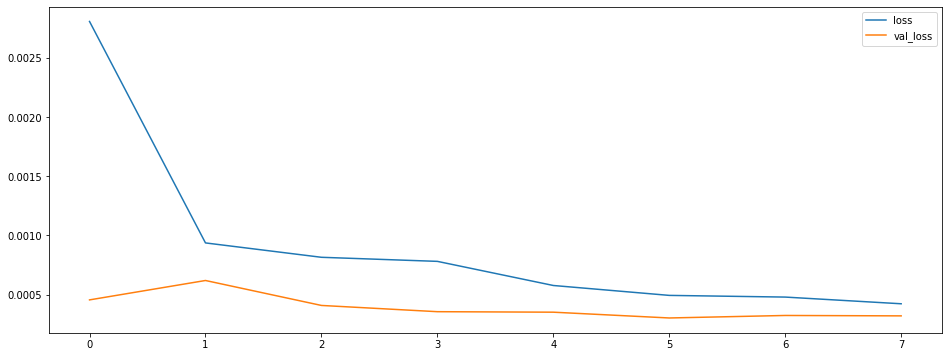

In [172]:
pd.DataFrame(model.history.history).plot(figsize = (16,6))

### lets make some predictions

In [173]:
test_predictions = []
batch = train_scaled[-length:]
current_batch = batch.reshape((1,length,n_features))
for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis = 1)

## predictions
- in a scaled format will need to inverse scale

In [174]:
test_predictions

[array([0.22964123], dtype=float32),
 array([0.23448509], dtype=float32),
 array([0.24017352], dtype=float32),
 array([0.24618918], dtype=float32),
 array([0.25214234], dtype=float32),
 array([0.25818524], dtype=float32),
 array([0.2644477], dtype=float32),
 array([0.27082998], dtype=float32),
 array([0.27728158], dtype=float32),
 array([0.28384033], dtype=float32),
 array([0.2904694], dtype=float32),
 array([0.29711106], dtype=float32),
 array([0.3037674], dtype=float32),
 array([0.31042755], dtype=float32),
 array([0.31710622], dtype=float32),
 array([0.32379493], dtype=float32),
 array([0.33047578], dtype=float32),
 array([0.33716536], dtype=float32),
 array([0.34386724], dtype=float32),
 array([0.35051727], dtype=float32),
 array([0.35707918], dtype=float32),
 array([0.3635808], dtype=float32),
 array([0.37001848], dtype=float32),
 array([0.37638885], dtype=float32),
 array([0.38273802], dtype=float32),
 array([0.38905478], dtype=float32),
 array([0.39534706], dtype=float32),
 arra

In [175]:
true_predicitons = scalar.inverse_transform(test_predictions)

In [176]:
true_predicitons

array([[ 5.45222521],
       [ 5.51534072],
       [ 5.58946095],
       [ 5.66784498],
       [ 5.74541469],
       [ 5.82415365],
       [ 5.90575339],
       [ 5.98891458],
       [ 6.07297902],
       [ 6.15843948],
       [ 6.24481639],
       [ 6.33135717],
       [ 6.41808939],
       [ 6.50487093],
       [ 6.59189401],
       [ 6.67904795],
       [ 6.76609938],
       [ 6.85326458],
       [ 6.94059017],
       [ 7.02724007],
       [ 7.11274169],
       [ 7.19745773],
       [ 7.28134082],
       [ 7.36434669],
       [ 7.44707645],
       [ 7.52938372],
       [ 7.61137218],
       [ 7.69300764],
       [ 7.77440235],
       [ 7.85559862],
       [ 7.93666908],
       [ 8.01760168],
       [ 8.09842788],
       [ 8.1792168 ],
       [ 8.26002242],
       [ 8.3409026 ],
       [ 8.42187481],
       [ 8.5023022 ],
       [ 8.58144462],
       [ 8.65944848],
       [ 8.7363961 ],
       [ 8.8119807 ],
       [ 8.88559261],
       [ 8.95756036],
       [ 9.02804354],
       [ 9

### lets combie the two
- we will get an error here but will ignore

In [177]:
test["predicitons"] = true_predicitons

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


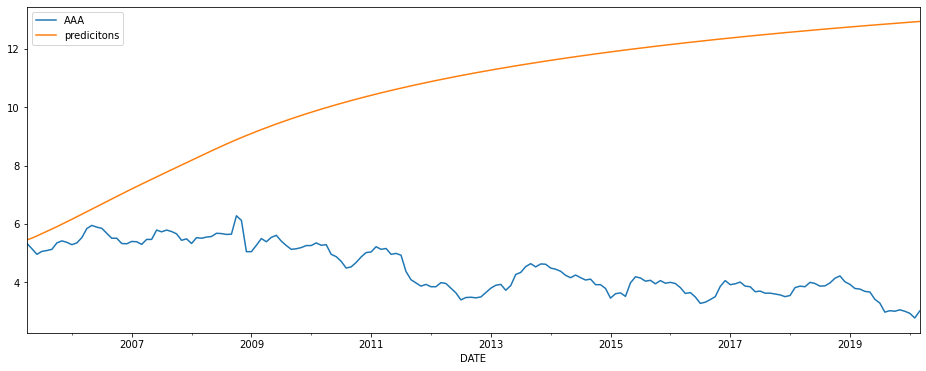

In [178]:
test.plot(figsize =(16,6))

## first month
- Looks like our model predicted the first month accurately 
- This is what we want. We will forecast using this
- Model Predicts for 2005-04-01 5.45 and true value is 5.33 (pretty accurate)

In [179]:
test

,AAA,predicitons
DATE,,
2005-04-01,5.33,5.452225
2005-05-01,5.15,5.515341
2005-06-01,4.96,5.589461
2005-07-01,5.06,5.667845
2005-08-01,5.09,5.745415
...,...,...
2019-11-01,3.06,12.881150
2019-12-01,3.01,12.894216
2020-01-01,2.94,12.907185


### forecasting
- We will look at a forecasting into the future with our new model
- We will train our entire data set to the model 

In [181]:
full_scalar = MinMaxScaler()

In [182]:
data_scaled = full_scalar.fit_transform(data)

## generator 
- Length will stay the same 
- N_features will also stay the same

In [183]:
genn = TimeseriesGenerator(data_scaled, data_scaled,length=length, batch_size=1)

## No validation data:
- because we are using the entire set we cannot use early stoppage 
- this is because there is not way to add validation data or calculate a "val_loss"

In [186]:
model = Sequential()
model.add(LSTM(units = 100, activation = "relu", input_shape = (length, n_features)))
model.add(Dense(units = 1))
model.compile(optimizer = "adam", loss = "mse")

In [187]:
model.fit_generator(generator=genn, epochs=20)

Epoch 1/20
1209/1209 [==============================] - 15s 13ms/step - loss: 0.0021
Epoch 2/20
1209/1209 [==============================] - 13s 11ms/step - loss: 8.1786e-04
Epoch 3/20
1209/1209 [==============================] - 13s 11ms/step - loss: 7.5026e-04
Epoch 4/20
1209/1209 [==============================] - 13s 11ms/step - loss: 5.8903e-04
Epoch 5/20
1209/1209 [==============================] - 13s 11ms/step - loss: 4.7302e-04
Epoch 6/20
1209/1209 [==============================] - 13s 11ms/step - loss: 4.4061e-04
Epoch 7/20
1209/1209 [==============================] - 13s 11ms/step - loss: 3.7260e-04
Epoch 8/20
1209/1209 [==============================] - 13s 11ms/step - loss: 3.4428e-04
Epoch 9/20
1209/1209 [==============================] - 13s 11ms/step - loss: 3.2699e-04
Epoch 10/20
1209/1209 [==============================] - 14s 11ms/step - loss: 3.2709e-04
Epoch 11/20
1209/1209 [==============================] - 13s 11ms/step - loss: 3.0344e-04
Epoch 12/20
1209/1209 [

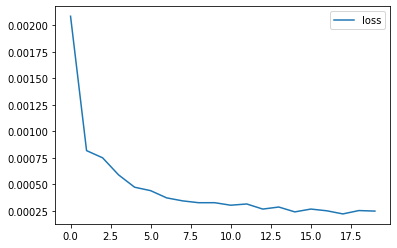

In [189]:
pd.DataFrame(model.history.history).plot()

## Developing Forecast
- 6 months in to the future

In [190]:
forecast = []
periods = length
first_batch = data_scaled[-length:]
current_batch = first_batch.reshape((1,length,n_features))

for i in range(periods):
    current_predicitons = model.predict(current_batch)[0]
    forecast.append(current_predicitons)
    current_batch = np.append(current_batch[:,1:,:], [[current_predicitons]], axis = 1)

In [191]:
forecast

[array([0.03488421], dtype=float32),
 array([0.02801976], dtype=float32),
 array([0.02181396], dtype=float32),
 array([0.01651848], dtype=float32),
 array([0.01223139], dtype=float32),
 array([0.00890869], dtype=float32)]

In [192]:
true_forecast = full_scalar.inverse_transform(forecast)

### True _forecasted Data

In [193]:
true_forecast

array([[2.91454122],
       [2.82509752],
       [2.74423588],
       [2.67523581],
       [2.61937498],
       [2.57608022]])

## need to add Dates to these forecast
- Start will be after the end of our entire data set
- 2020-3-1 is the end so we will start at 2020-4-1

In [194]:
data.tail()

,AAA
DATE,
2019-11-01,3.06
2019-12-01,3.01
2020-01-01,2.94
2020-02-01,2.78
2020-03-01,3.02


In [195]:
date_index = pd.date_range(start="2020-4-1", freq= "MS", periods=periods)

In [196]:
date_index

DatetimeIndex(['2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01',
               '2020-08-01', '2020-09-01'],
              dtype='datetime64[ns]', freq='MS')

## lets make a data frame

In [208]:
forecast_df = pd.DataFrame(true_forecast, index=date_index, columns= ["forecast"])

# Focus on the first month forecast:
- model forecasts that the Aaa bond index for 2020-4-1 will be 2.91

In [209]:
forecast_df

,forecast
2020-04-01,2.914541
2020-05-01,2.825098
2020-06-01,2.744236
2020-07-01,2.675236
2020-08-01,2.619375
2020-09-01,2.576080


### lets plot our original data with the forecasted data

(600.0, 608.0)

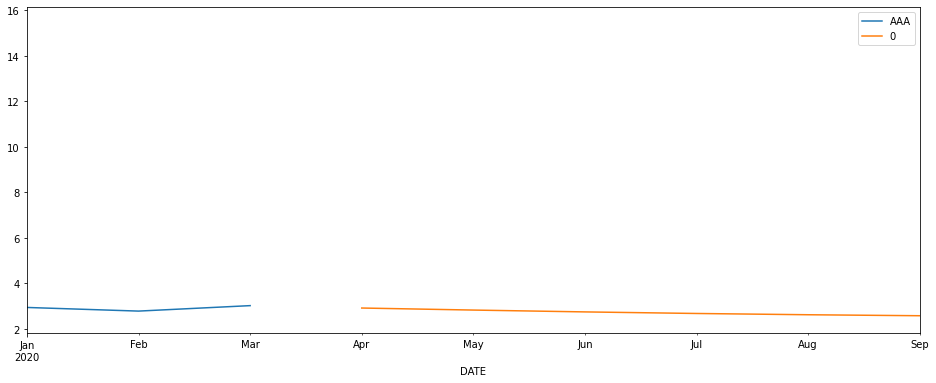

In [207]:
ax = data.plot(figsize = (16,6))
forecast_df.plot(ax =ax)
plt.xlim("2020-1-1","2020-09-01")